In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")

In [3]:
select_label = [0, 1, 2, 3]
select_habits = [0., 1.]

In [4]:
train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力"],[0,1,2,3] , inplace = True)

In [5]:
train = train[train['推薦類型'].isin(select_label)]

In [6]:
train = train[train['拳擊'].isin(select_habits)]
train = train[train['器材'].isin(select_habits)]
train = train[train['有氧'].isin(select_habits)]
train = train[train['舞蹈'].isin(select_habits)]
train = train[train['高強度間歇'].isin(select_habits)]
train = train[train['瑜伽'].isin(select_habits)]
train = train[train['肌力訓練'].isin(select_habits)]
train = train[train['燃脂'].isin(select_habits)]
train = train[train['減脂瘦身'].isin(select_habits)]
train = train[train['增加肌肉'].isin(select_habits)]
train = train[train['增強體魄'].isin(select_habits)]
train = train[train['舒緩壓力'].isin(select_habits)]

In [7]:
train = train[train['年齡']<70]

In [8]:
train = train[train['BMI']> 15]

In [9]:
train["BMI"].value_counts()

22.491349    307
19.879103    127
23.875115     80
18.818924     71
16.358025     63
            ... 
20.693056      1
22.852056      1
23.143572      1
17.088284      1
22.157158      1
Name: BMI, Length: 2397, dtype: int64

In [10]:
train["年齡"].value_counts()

46.0    352
47.0    294
45.0    166
27.0    159
48.0    146
44.0    142
33.0    142
31.0    121
42.0    104
43.0     95
38.0     95
30.0     87
41.0     84
36.0     81
37.0     80
34.0     80
29.0     79
35.0     77
28.0     76
26.0     73
40.0     69
39.0     68
50.0     63
32.0     61
23.0     60
24.0     56
22.0     49
49.0     47
25.0     40
16.0     19
19.0     17
56.0     16
61.0     15
13.0     14
18.0     14
15.0     11
20.0     11
54.0     11
53.0     11
51.0     11
52.0     10
55.0      9
21.0      9
58.0      8
17.0      8
14.0      7
57.0      7
11.0      7
12.0      7
62.0      5
64.0      4
60.0      4
59.0      4
63.0      1
65.0      1
Name: 年齡, dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 5 to 26416
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      3287 non-null   float64
 1   年齡      3287 non-null   float64
 2   BMI     3287 non-null   float64
 3   拳擊      3287 non-null   float64
 4   器材      3287 non-null   float64
 5   有氧      3287 non-null   float64
 6   舞蹈      3287 non-null   float64
 7   高強度間歇   3287 non-null   float64
 8   瑜伽      3287 non-null   float64
 9   肌力訓練    3287 non-null   float64
 10  燃脂      3287 non-null   float64
 11  減脂瘦身    3287 non-null   float64
 12  增加肌肉    3287 non-null   float64
 13  增強體魄    3287 non-null   float64
 14  舒緩壓力    3287 non-null   float64
 15  推薦類型    3287 non-null   object 
dtypes: float64(15), object(1)
memory usage: 436.6+ KB


In [12]:
train['推薦類型'] = train['推薦類型'].astype("int64")

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 5 to 26416
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   性別      3287 non-null   float64
 1   年齡      3287 non-null   float64
 2   BMI     3287 non-null   float64
 3   拳擊      3287 non-null   float64
 4   器材      3287 non-null   float64
 5   有氧      3287 non-null   float64
 6   舞蹈      3287 non-null   float64
 7   高強度間歇   3287 non-null   float64
 8   瑜伽      3287 non-null   float64
 9   肌力訓練    3287 non-null   float64
 10  燃脂      3287 non-null   float64
 11  減脂瘦身    3287 non-null   float64
 12  增加肌肉    3287 non-null   float64
 13  增強體魄    3287 non-null   float64
 14  舒緩壓力    3287 non-null   float64
 15  推薦類型    3287 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 436.6 KB


In [14]:
X = train.drop(["推薦類型"], axis =1)
y = train["推薦類型"]

<AxesSubplot:>

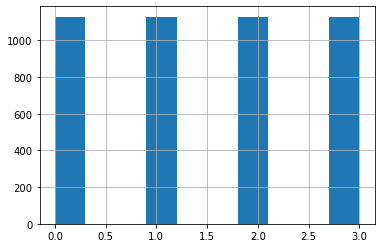

In [15]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X,y)
y.hist()

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_val, y_train, y_val = train_test_split(
   X_scaled, y, test_size=0.33, random_state=42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


def accuracy_score(y_val,y_pred):
    Sum = 0
    y_val = y_val.tolist()
    y_pred = y_pred.tolist()
    for i in range(len(y_pred)):
        if y_val[i] == y_pred[i]:
            Sum+=1
    score = Sum/len(y_pred)
    
    return score


rnd_clf = RandomForestClassifier(random_state=0,n_estimators=200,max_features = 15)
xgb_clf =  XGBClassifier(random_state=0, n_estimators=400, max_depth = 8,learning_rate =0.1)

voting_clf = VotingClassifier(estimators=[('xg', xgb_clf), ('rf', rnd_clf)],voting='hard')
voting_clf.fit(X_train, y_train)
for clf in (xgb_clf, rnd_clf,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.8558014755197854
RandomForestClassifier 0.8537894030851777
[19:53:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


VotingClassifier 0.8544600938967136


In [22]:
voting_clf.fit(X_scaled,y)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(test)
test_scaled = scaler.transform(test)

y_pred = voting_clf.predict(test_scaled)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9626446280991735


C:\Users\KYLE\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.823608316566063

In [54]:
#tuned_parameters = {'kernel': ['poly'], 'gamma': [0.5,1,2,10],'C': [1, 10, 100]}
                  

accuracy score 0.8551307847082495
The best model param : {'max_depth': 15, 'max_features': 6, 'n_estimators': 200}
